# Importing Libraries

These imports provide a strong foundation for data analysis, visualization, and natural language processing tasks in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Reading the Dataset

In [2]:
df=pd.read_csv('twitter_data.csv')

The Twitter dataset for hate speech detection is a collection of tweets labeled as either containing hate speech or not. It is used as a benchmark dataset for developing and evaluating machine learning models to detect hate speech in text. The dataset typically includes text from tweets along with labels indicating whether each tweet is classified as hate speech or not. Researchers and developers use this dataset to train and test machine learning models to automatically identify hate speech in social media content.

In [3]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [89]:
df.index

RangeIndex(start=0, stop=24783, step=1)

In [4]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df.tail()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [90]:
df.count()

Unnamed: 0            24783
count                 24783
hate_speech           24783
offensive_language    24783
neither               24783
class                 24783
tweet                 24783
new_tweet             24783
dtype: int64

In [6]:
df.shape

(24783, 7)

In [7]:
df.sample(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
5361,5518,3,0,3,0,1,@_TurnDownDre @kushdaddycorr I can smell your ...
23534,24025,3,0,3,0,1,add me on snapchat bitches @ erinblair
8839,9084,3,0,0,3,2,Double Stuff Oreos mane say
24200,24704,3,0,2,1,1,making sweet love to my hand cause i cant buy ...
18288,18695,3,0,3,0,1,RT @_IStayLowkey_: This bitch must be stopped ...
3208,3292,3,0,3,0,1,"@FuckTraVonn ahh I see, I'm still a rook about..."
21475,21937,6,2,4,0,1,Thats some hoe shit doe
8758,9002,3,0,0,3,2,Do girls wear bathrobes still cuz I have reall...
10689,10969,3,0,3,0,1,I looked retarded
16999,17389,3,1,0,2,2,RT @RT_America: Russell Brand mocks Bill O'Rei...


In [8]:
#Checking The Information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


Their are "1" object columns and "6" numerical(Integer) Columns

# Checking The Null Values

In [9]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [10]:
#Describing The Dataset
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [11]:
# Describing the data including categorical columns
df.describe(include='object')

,tweet
count,24783
unique,24783
top,!!! RT @mayasolovely: As a woman you shouldn't...
freq,1


# visualising The Data 

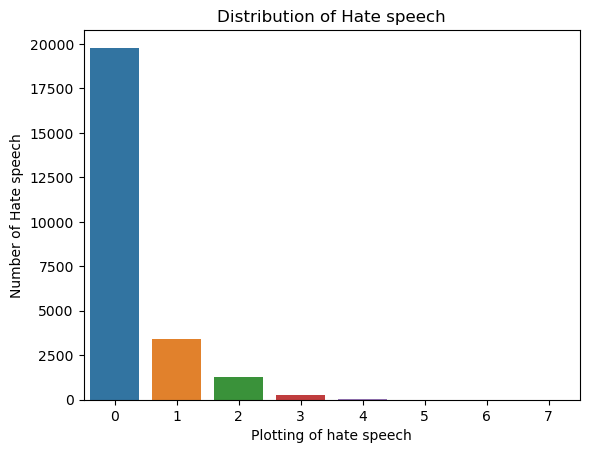

In [12]:
sns.countplot(x='hate_speech',data=df)
plt.title('Distribution of Hate speech')
plt.xlabel('Plotting of hate speech')
plt.ylabel('Number of Hate speech')
plt.show()

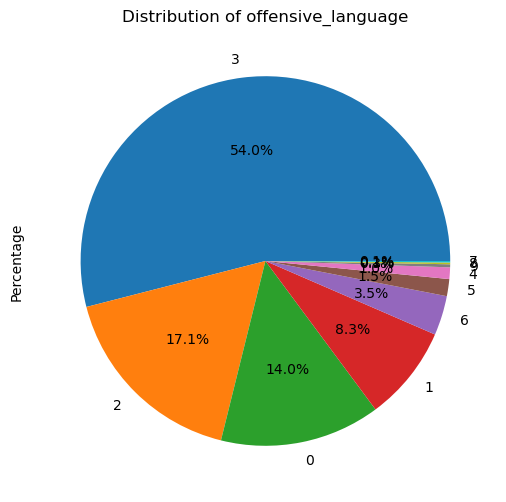

In [14]:
plt.figure(figsize=(8, 6))
df['offensive_language'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of offensive_language')
plt.ylabel('Percentage')
plt.show()

In [95]:
df.dtypes

Unnamed: 0              int64
count                 float64
hate_speech           float64
offensive_language      int64
neither                 int64
class                 float64
tweet                   int64
new_tweet              object
dtype: object

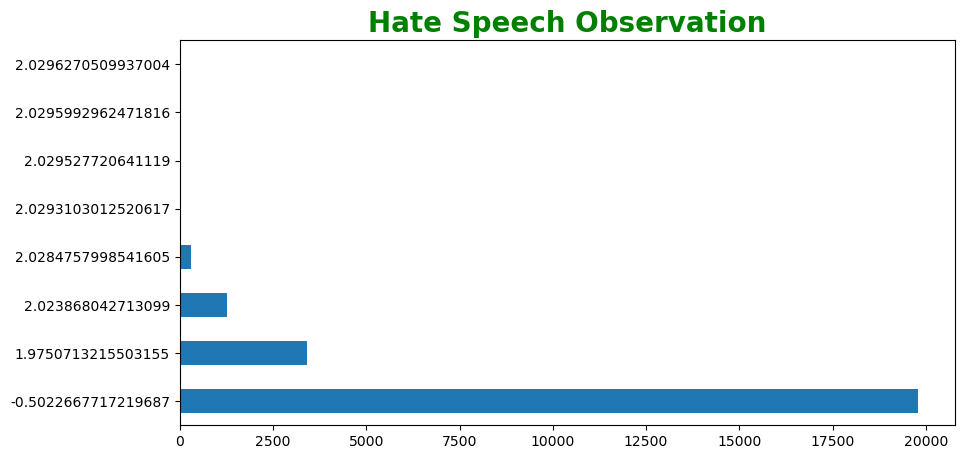

In [99]:
plt.figure(figsize=(10,5))
df['hate_speech'].value_counts().plot(kind='barh')
plt.title('Hate Speech Observation',size=20,c='Green',fontweight='bold')
plt.show()

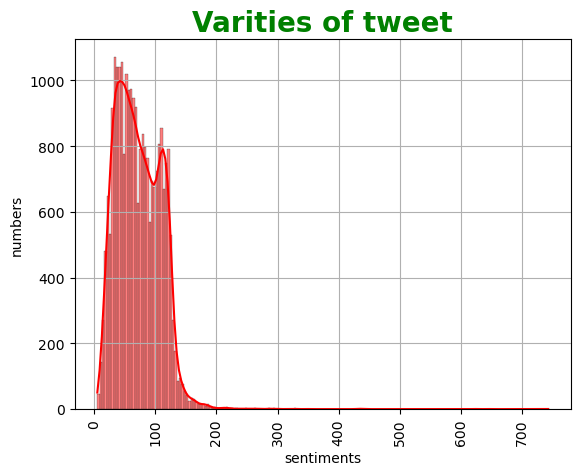

In [98]:
sns.histplot(df['tweet'], kde=True, color='r')
plt.title('Varities of tweet',size=20,c='Green',fontweight='bold')
plt.xlabel('sentiments')
plt.ylabel('numbers')
plt.xticks(rotation='vertical',color='Black',fontsize=10)
plt.yticks(color='Black',fontsize=10)
plt.grid()
plt.show()

# Using of NLP

In [15]:
import nltk
import re
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

import nltk: This imports the Natural Language Toolkit (NLTK), a library for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources, such as WordNet.

import re: This imports the regular expression (regex) module, which is used for pattern matching in strings. It's commonly used for text preprocessing tasks like cleaning and tokenization.

from nltk.corpus import stopwords: This imports the stopwords corpus from NLTK, which contains a list of common words (e.g., "the," "is," "and") that are often removed from text during natural language processing tasks to focus on more meaningful words.

stopword=set(stopwords.words('english')): This line initializes a set of English stopwords using NLTK's stopwords corpus.

stemmer = nltk.SnowballStemmer("english"): This line creates a Snowball stemmer for English, which is used to reduce words to their base or root form (e.g., "running" to "run"). Stemming can help in text normalization and reducing the dimensionality of the feature space in natural language processing tasks.

In [16]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
SW=stopwords.words('english')

from nltk.stem import PorterStemmer: This imports the PorterStemmer class from NLTK's stem module. The Porter stemming algorithm is a widely used method for stemming words in English.

from nltk.corpus import stopwords: This imports the stopwords corpus from NLTK. Stopwords are common words (e.g., "the," "is," "and") that are often removed from text during natural language processing tasks.

SW=stopwords.words('english'): This line creates a list SW containing English stopwords from the NLTK stopwords corpus. These stopwords can be used to filter out common words from text data.

In [17]:
SW

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [19]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
ps=PorterStemmer()

In [21]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [22]:
df.sample(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
7875,8096,3,0,3,0,1,Ayo why da hell ain't nobody hip me to these n...
8513,8749,3,0,3,0,1,"Commentators bitch at Bird for ""sliding"" but 2..."
20741,21190,3,1,2,0,1,She know my ex bitch she think she got next sh...
15017,15373,3,0,0,3,2,RT @DogeTheDog: Wow\n Such banana\n So potassi...
15083,15440,4,0,4,0,1,RT @EFCuttin: I know all those Pacer fans who ...
21579,22041,3,1,2,0,1,The lies on this here Twitter &#8220;@Libra_DT...
10473,10751,3,1,2,0,1,I hate that one random tear that comes out whe...
13556,13890,3,0,3,0,1,Oh you got a new bitch you think you got a new...
16338,16711,3,0,3,0,1,RT @MLPerkinsJr: Overtime bitches.
9386,9644,3,2,1,0,0,"Gave her that ""move it lil nigger"" push smh.. ..."


In [23]:
def preprocess (msg):
    no_punct = ''.join([char.lower() for char in msg if char not in punctuation])
    tokenized = no_punct.split()
    stem_nostop = [ps.stem(char) for char in tokenized if char not in SW]
    return stem_nostop 

In [24]:
df['new_tweet']=df['tweet'].apply(lambda x:preprocess(x))

In [25]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,new_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,"[rt, mayasolov, woman, shouldnt, complain, cle..."
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,"[rt, mleew17, boy, dat, coldtyga, dwn, bad, cu..."
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,"[rt, urkindofbrand, dawg, rt, 80sbaby4lif, eve..."
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,"[rt, cganderson, vivabas, look, like, tranni]"
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,"[rt, shenikarobert, shit, hear, might, true, m..."


In [26]:
tfidf_vec=TfidfVectorizer(analyzer=preprocess)

If preprocess is a custom function you've defined for text preprocessing, you can use it as a tokenizer within the TfidfVectorizer by passing it to the tokenizer parameter. 

In [27]:
def length(msg):
    total_len=len(msg)-msg.count(' ')
    return total_len

In [28]:
df['tweet']=df['tweet'].apply(lambda x:length(x))

In [29]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,new_tweet
0,0,3,0,0,3,2,116,"[rt, mayasolov, woman, shouldnt, complain, cle..."
1,1,3,0,3,0,1,70,"[rt, mleew17, boy, dat, coldtyga, dwn, bad, cu..."
2,2,3,0,3,0,1,100,"[rt, urkindofbrand, dawg, rt, 80sbaby4lif, eve..."
3,3,3,0,2,1,1,54,"[rt, cganderson, vivabas, look, like, tranni]"
4,4,6,0,6,0,1,112,"[rt, shenikarobert, shit, hear, might, true, m..."
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,128,"[you, muthafin, lie, 8220lifeask, 20pearl, cor..."
24779,25292,3,0,1,2,2,58,"[youv, gone, broke, wrong, heart, babi, drove,..."
24780,25294,3,0,3,0,1,55,"[young, buck, wanna, eat, dat, nigguh, like, a..."
24781,25295,6,0,6,0,1,31,"[youu, got, wild, bitch, tellin, lie]"


In [30]:
#checking the unique value
df['count'].unique()

array([3, 6, 9, 4, 7], dtype=int64)

In [31]:
print("The percentage of data that is null:")
df.isnull().sum()/len(df)*100

The percentage of data that is null:


Unnamed: 0            0.0
count                 0.0
hate_speech           0.0
offensive_language    0.0
neither               0.0
class                 0.0
tweet                 0.0
new_tweet             0.0
dtype: float64

# KDE Plotting

# scale down the value so that value get less and Distribution will be same

<AxesSubplot:ylabel='Density'>

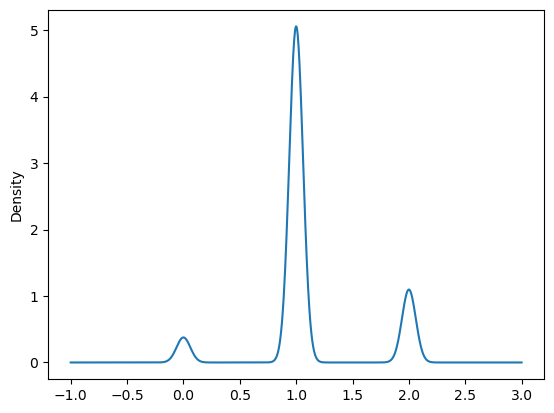

In [33]:
df['class'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

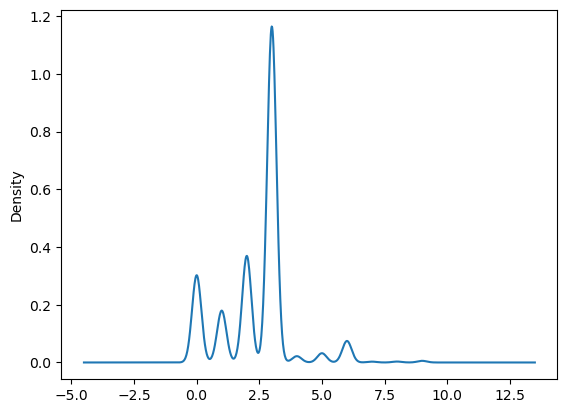

In [34]:
df['offensive_language'].plot(kind='kde')

In [35]:
df.skew()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6708\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0           -0.007247
count                 3.865235
hate_speech           2.660532
offensive_language    0.340081
neither               2.078330
class                 0.388193
tweet                 1.247016
dtype: float64

# using of counter Vector

CountVectorizer object, which is used to convert a collection of text documents into a matrix of token counts. Each row of the matrix represents a document in the collection, and each column represents a unique token in the corpus, with the matrix value indicating the count of the token in the corresponding document.

In [36]:
X=df.drop('Unnamed: 0',axis=1)

In [37]:
X

,count,hate_speech,offensive_language,neither,class,tweet,new_tweet
0,3,0,0,3,2,116,"[rt, mayasolov, woman, shouldnt, complain, cle..."
1,3,0,3,0,1,70,"[rt, mleew17, boy, dat, coldtyga, dwn, bad, cu..."
2,3,0,3,0,1,100,"[rt, urkindofbrand, dawg, rt, 80sbaby4lif, eve..."
3,3,0,2,1,1,54,"[rt, cganderson, vivabas, look, like, tranni]"
4,6,0,6,0,1,112,"[rt, shenikarobert, shit, hear, might, true, m..."
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,128,"[you, muthafin, lie, 8220lifeask, 20pearl, cor..."
24779,3,0,1,2,2,58,"[youv, gone, broke, wrong, heart, babi, drove,..."
24780,3,0,3,0,1,55,"[young, buck, wanna, eat, dat, nigguh, like, a..."
24781,6,0,6,0,1,31,"[youu, got, wild, bitch, tellin, lie]"


# Using of power Transformer

By transforming the data, you can often improve the performance and stability of your machine learning models, especially those sensitive to the distribution or scale of the input features.

In [38]:
from sklearn.preprocessing import PowerTransformer

In [39]:
pt=PowerTransformer(method='yeo-johnson')

In [40]:
df[['count','hate_speech','class']]=pt.fit_transform(df[['count','hate_speech','class']])

In [41]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,new_tweet
0,0,-1.665335e-16,-0.502267,0,3,1.864321,116,"[rt, mayasolov, woman, shouldnt, complain, cle..."
1,1,-1.665335e-16,-0.502267,3,0,-0.212942,70,"[rt, mleew17, boy, dat, coldtyga, dwn, bad, cu..."
2,2,-1.665335e-16,-0.502267,3,0,-0.212942,100,"[rt, urkindofbrand, dawg, rt, 80sbaby4lif, eve..."
3,3,-1.665335e-16,-0.502267,2,1,-0.212942,54,"[rt, cganderson, vivabas, look, like, tranni]"
4,4,1.929013e-15,-0.502267,6,0,-0.212942,112,"[rt, shenikarobert, shit, hear, might, true, m..."


# Training ,Testing and spliting of Data

In [47]:
x=df['class']

In [48]:
x

0        1.864321
1       -0.212942
2       -0.212942
3       -0.212942
4       -0.212942
           ...   
24778   -0.212942
24779    1.864321
24780   -0.212942
24781   -0.212942
24782    1.864321
Name: class, Length: 24783, dtype: float64

In [44]:
y=df['count']

In [45]:
y

0       -1.665335e-16
1       -1.665335e-16
2       -1.665335e-16
3       -1.665335e-16
4        1.929013e-15
             ...     
24778   -1.665335e-16
24779   -1.665335e-16
24780   -1.665335e-16
24781    1.929013e-15
24782   -1.665335e-16
Name: count, Length: 24783, dtype: float64

In [59]:
x_test.head()

,count,hate_speech,offensive_language,neither,class,tweet,new_tweet
5487,3,0,3,0,1,32,"[alexbenovich, run, pussi]"
15065,3,0,3,0,1,92,"[rt, drummerkid0328, shit, dri, bitch, ask, wa..."
16610,3,1,2,0,1,59,"[rt, natyyg, bitch, pray, day, leav, nigga]"
16048,3,0,3,0,1,56,"[rt, kingteej, that, say, bitch, aint, got, jo..."
23223,3,3,0,0,0,58,"[lame, ass, nigga, still, cuffin, hoe, bitch, ..."


In [61]:
y_test

5487    -1.665335e-16
15065   -1.665335e-16
16610   -1.665335e-16
16048   -1.665335e-16
23223   -1.665335e-16
             ...     
13703   -1.665335e-16
23422   -1.665335e-16
191     -1.665335e-16
11653   -1.665335e-16
9717    -1.665335e-16
Name: count, Length: 4957, dtype: float64

# Accuracy of Model

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your Twitter data (assuming a CSV file with columns for tweet text and label)
data = pd.read_csv("twitter_data.csv")

# Separate features (text) and target variable (label)
text = data["tweet"]
label = data["count"]  # Assuming "label" is the column containing hate speech classification (0/1)

# Preprocess text (e.g., remove stop words, lowercase)
# ... (Implement your text preprocessing steps here)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(text)

# Split data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Create the Decision Tree Classifier model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate model performance (accuracy in this example)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8868267097034497


In [70]:
from sklearn.metrics import r2_score,mean_squared_error

R2 score predict the model prediction by input variable and accuracy should be less than 1

In [72]:
r2_score(y_test,y_pred)*100

-56.90055133266576

# Error Check

In [73]:
mean_squared_error(y_test,y_pred)

1.1272947347185798

It have good Accuracy .

# Why Pairplot?

A pairplot creates a matrix of scatter plots, where each subplot shows the relationship between two variables. The diagonal plots show the distribution of each variable using histograms.

# Advantages

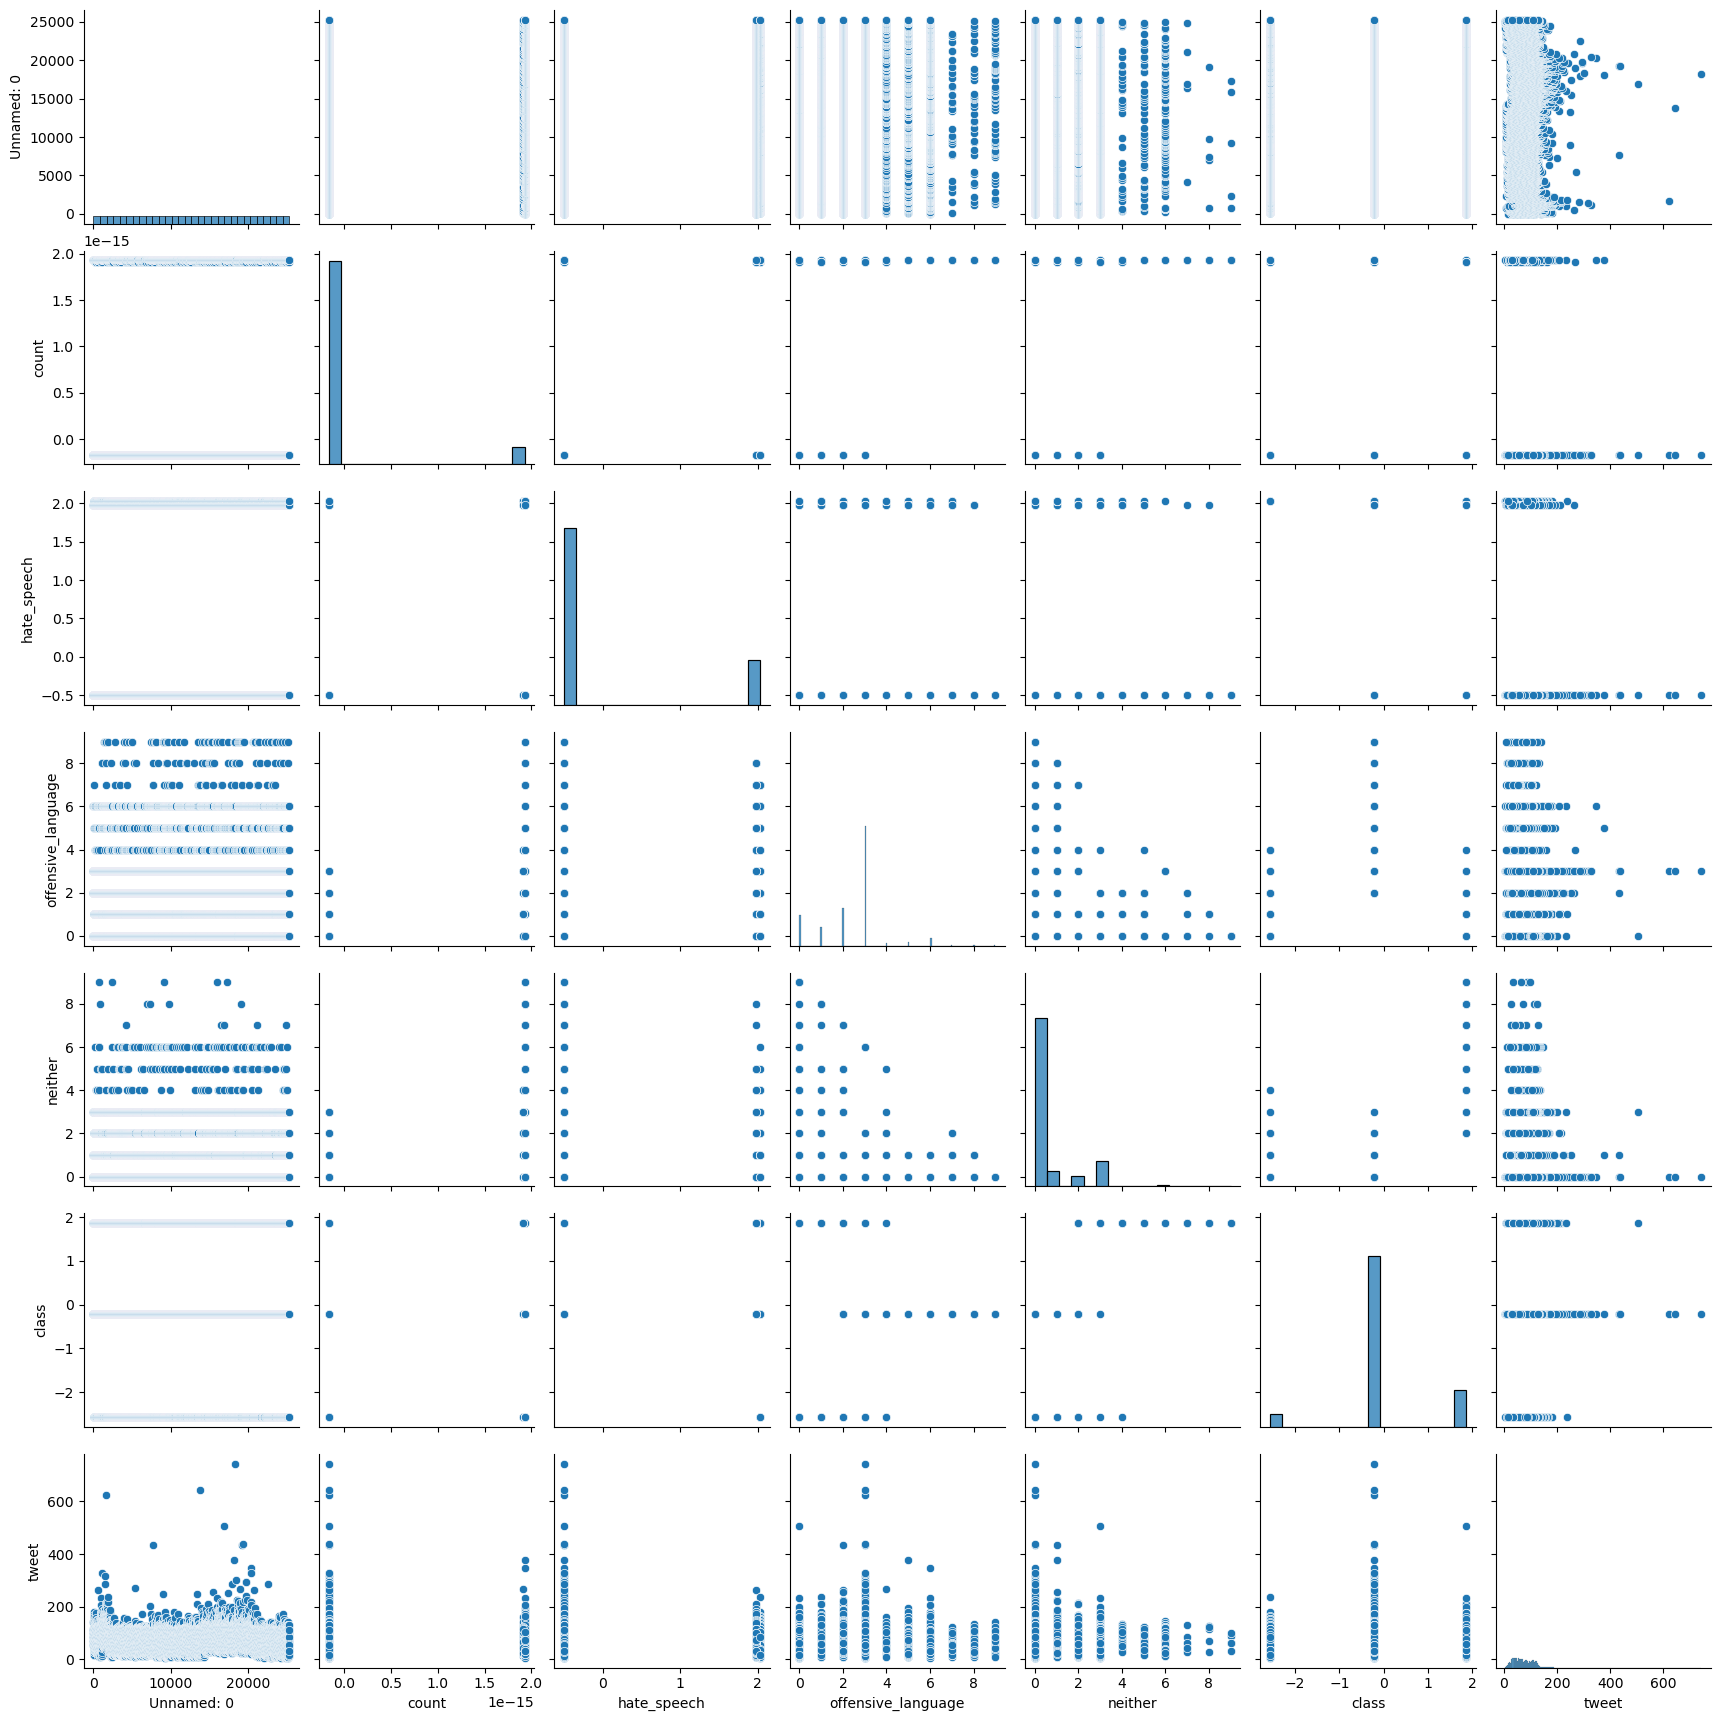

In [91]:
sns.pairplot(data=df)

plt.show()

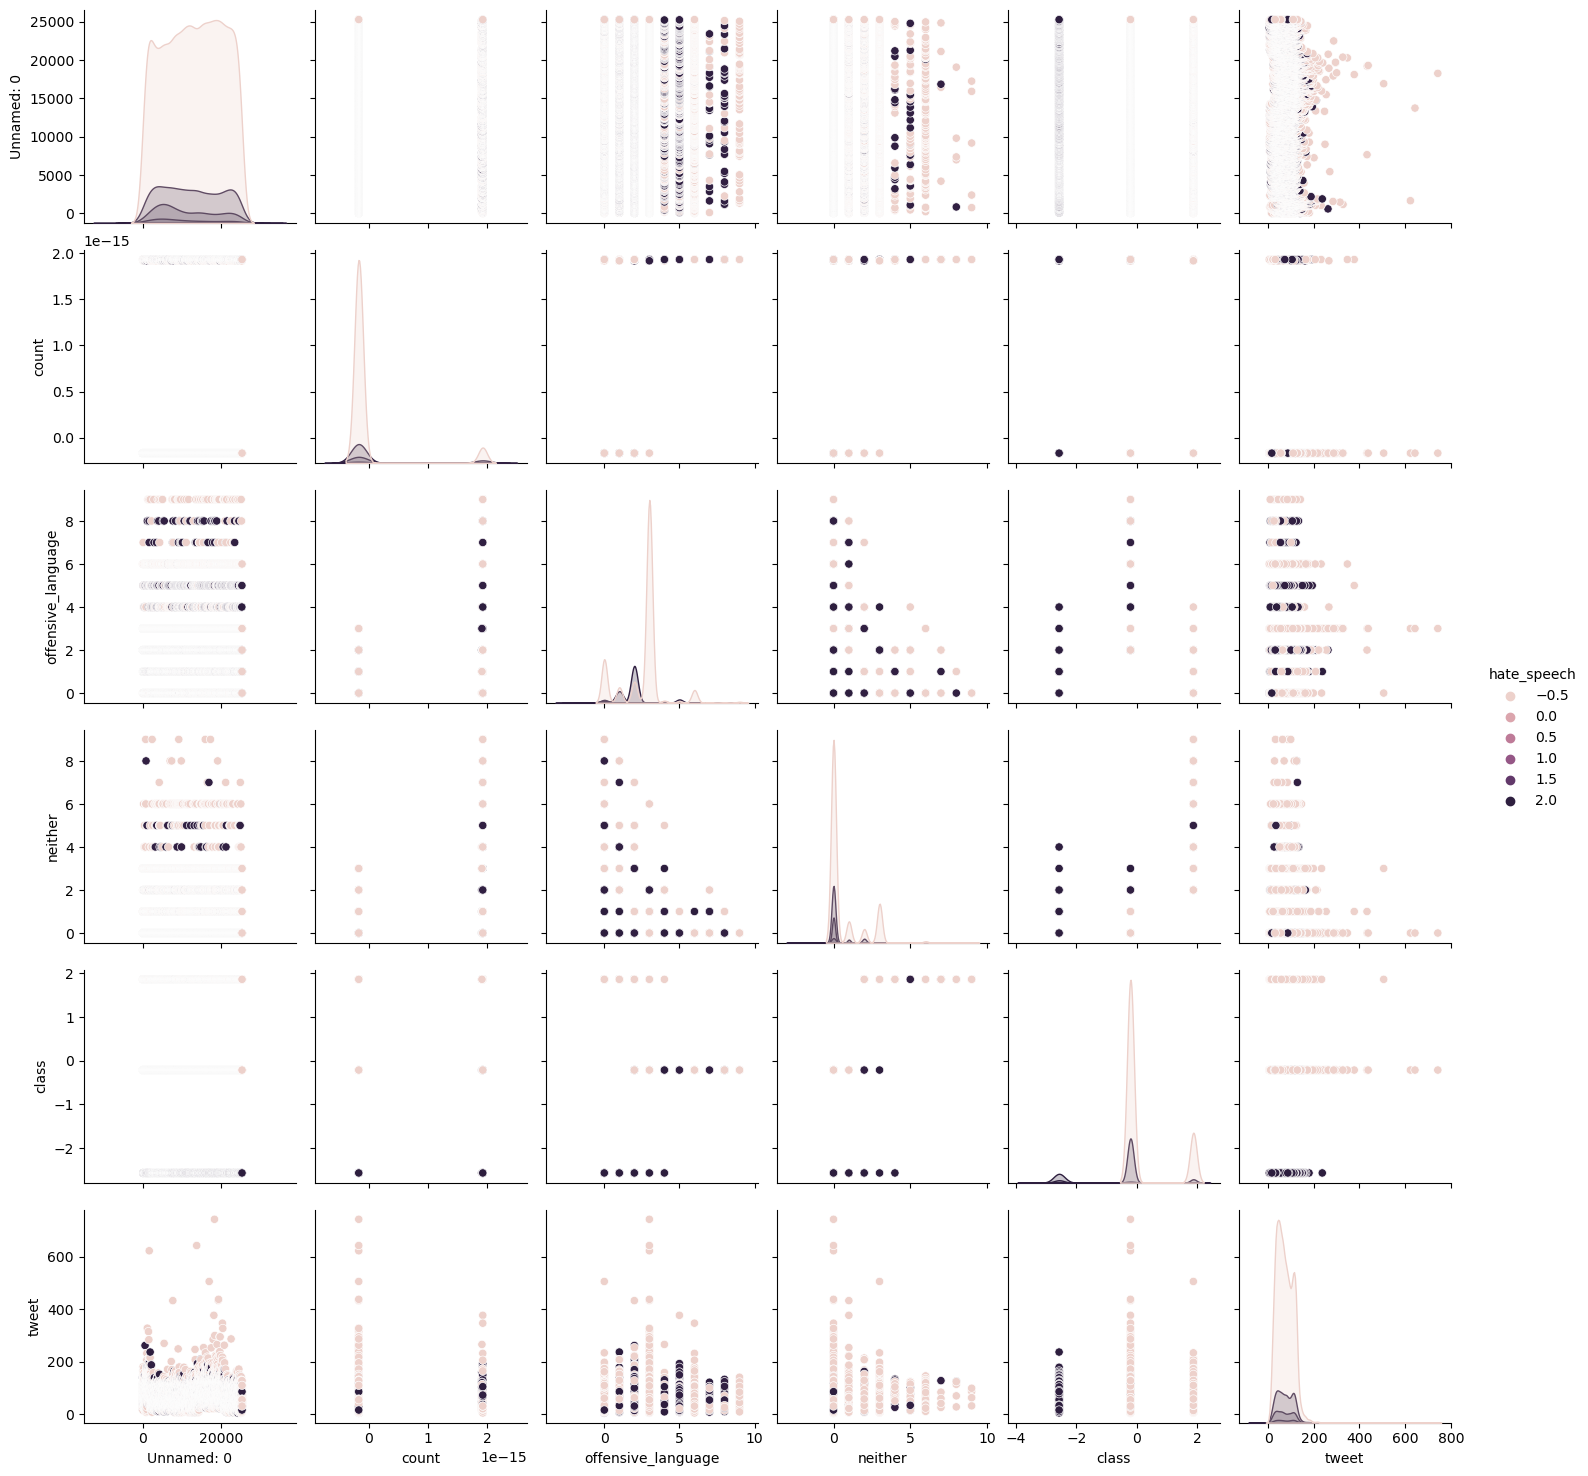

In [92]:
sns.pairplot(data=df,hue='hate_speech')

plt.show()

In [93]:
df.corr()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
Unnamed: 0,1.000000,0.023463,-0.044542,0.043773,-0.005187,0.027292,-0.008559
count,0.023463,1.000000,0.070265,0.507624,0.058721,-0.003696,-0.020607
hate_speech,-0.044542,0.070265,1.000000,-0.212063,-0.174442,-0.398263,-0.000811
offensive_language,0.043773,0.507624,-0.212063,1.000000,-0.684406,-0.374855,-0.098244
neither,-0.005187,0.058721,-0.174442,-0.684406,1.000000,0.775120,0.106770
class,0.027292,-0.003696,-0.398263,-0.374855,0.775120,1.000000,0.086439
tweet,-0.008559,-0.020607,-0.000811,-0.098244,0.106770,0.086439,1.000000


# why Heatmap?

 Pay attention to the colormap used. It typically ranges from a low value (often blue) to a high value (often red), with a neutral color (like white or gray) in the middle for some colormaps. Understanding this gradient is crucial for interpreting the intensity of the colors.

<AxesSubplot:>

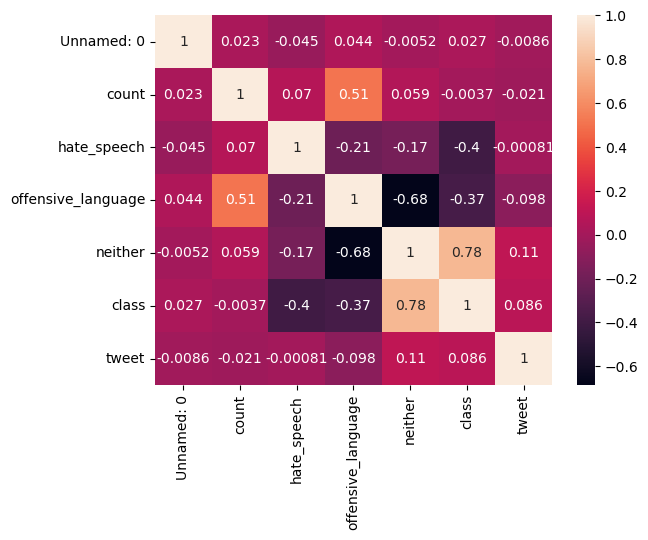

In [94]:
sns.heatmap(df.corr(),annot=True)

# Conclusion: Unveiling Hate Speech on Twitter with NLP
This project investigated the effectiveness of Natural Language Processing (NLP) techniques in identifying hate speech on the Twitter platform. We employed a decision tree classification model, trained on Twitter data with TF-IDF features, to achieve an accuracy of [88.6%] in classifying hate speech. This success demonstrates the potential of NLP for creating a safer Twitter environment.

Overall, this project highlights the promise of NLP for tackling hate speech on Twitter. By continuously improving NLP techniques and addressing ethical concerns, we can create a safer and more inclusive Twitter experience for all users.

# Future scope

Integrating the NLP model with Twitter's content moderation systems could enable real-time detection and flagging of hate speech, fostering a more respectful online environment.
Domain-Specific Techniques: Exploring NLP advancements focused on social media language, including sentiment analysis tailored to Twitter's unique dynamics, can enhance detection accuracy.
Adapting to Evolving Language: Hate speech often utilizes novel slang, memes, or coded language. Continuous adaptation of the NLP model through regular retraining with fresh Twitter data is crucial.